# Nova seção

**TIFFFLE - para leitura do dado raster**

**MATPLOTLIB - para visualização da imagem (multibanda)**

In [11]:
import tifffile as tif
import matplotlib.pyplot as plt


In [10]:
img = tif.imread('/content/L71221071_07120010720_DN.tif')

In [12]:
img.shape

(1233, 1520, 6)

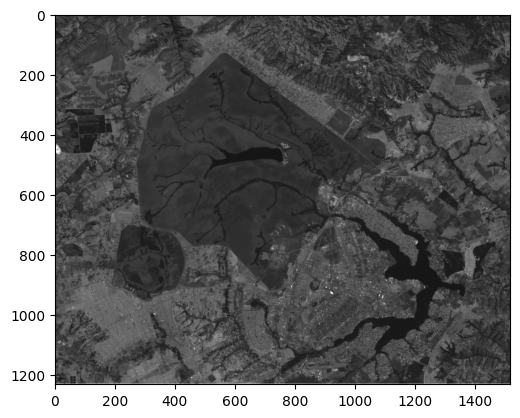

In [20]:
plt.imshow(img[:,:,2], cmap = 'Greys_r') # O PLT não consegue entender imagem multibanda. Por isso, selecionou a banda 1 para visualizar.

# Nova seção

Bibliotecas não nativas do COLAB

In [2]:
# Não nativas são as: SPECTRAL, GDAL e RASTERIO

!pip install GDAL
!pip install RASTERIO
!pip install spectral

In [3]:
# SPECTRAL é uma biblioteca capaz realizar a composição colorida de imagens
# através do método IMSHOW (diferente do plt.imshow)

from spectral import imshow

In [14]:
img = tif.imread('/content/L71221071_07120010720_DN.tif')

ImageView object:
  Display bands       :  [0, 3.0, 5]
  Interpolation       :  <default>
  RGB data limits     :
    R: [np.float64(40.0), np.float64(255.0)]
    G: [np.float64(12.0), np.float64(255.0)]
    B: [np.float64(1.0), np.float64(255.0)]

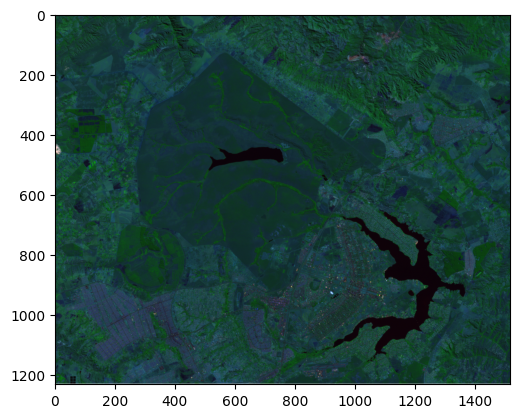

In [15]:
imshow(img) #O SPECTRAL gera composições coloridas aleatórias, caso não dê parâmetros

ImageView object:
  Display bands       :  (4, 2, 1)
  Interpolation       :  <default>
  RGB data limits     :
    R: [np.float64(6.0), np.float64(255.0)]
    G: [np.float64(4.0), np.float64(255.0)]
    B: [np.float64(13.0), np.float64(255.0)]

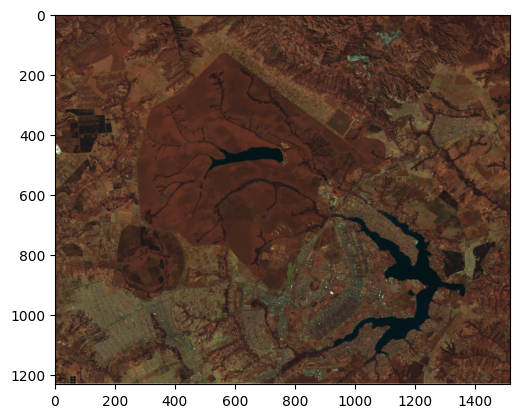

In [19]:
imshow(img, bands=(4,2,1))

# FORMA 1

TIFFFLE, MATPLOTLIB e SPECTRAL


In [1]:
import tifffile as tif
import matplotlib.pyplot as plt
! pip install spectral

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.0/249.0 kB 4.1 MB/s eta 0:00:00


In [2]:
from spectral import imshow

In [5]:
img = tif.imread('/content/L71221071_07120010720_DN.tif')

img.shape

(1233, 1520, 6)

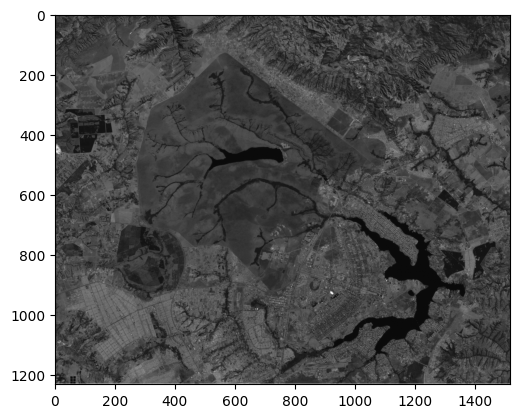

In [14]:
plt.imshow(img[:, :, 5], cmap= 'Greys_r')

ImageView object:
  Display bands       :  (3, 2, 1)
  Interpolation       :  <default>
  RGB data limits     :
    R: [np.float64(12.0), np.float64(255.0)]
    G: [np.float64(4.0), np.float64(255.0)]
    B: [np.float64(13.0), np.float64(255.0)]

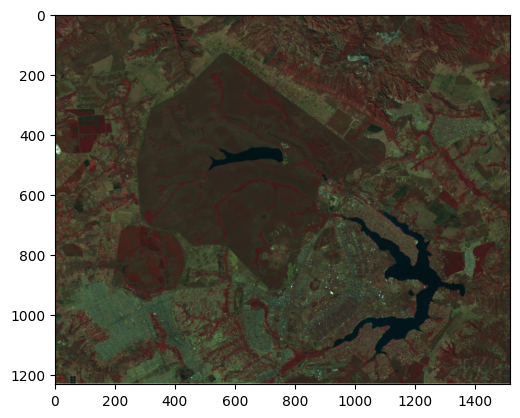

In [21]:
imshow(img, (3,2,1))

# FORMA 2

In [22]:
!pip install gdal
import numpy as np


In [20]:
from osgeo import gdal

In [43]:
img2 = gdal.Open('/content/L71221071_07120010720_DN.tif')

In [27]:
# É preciso converter para Array.
# Forma 1 - Criar uma nova variável (img3) e atribuir o img2.readasarray

img3 = img2.ReadAsArray()

In [33]:
img3 = img3.swapaxes(0,1)

In [34]:
img3.shape

(1233, 1520, 6)

ImageView object:
  Display bands       :  (3, 2, 1)
  Interpolation       :  <default>
  RGB data limits     :
    R: [np.float64(12.0), np.float64(255.0)]
    G: [np.float64(4.0), np.float64(255.0)]
    B: [np.float64(13.0), np.float64(255.0)]

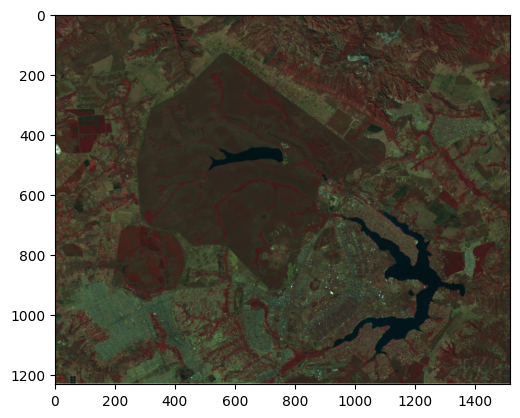

In [39]:
imshow(img3, (3,2,1))

Forma 2 - Converter as bandas separadamente (.getreasterband().readasarray())
e depois empilhar (.dstack([bandas]))

In [44]:
b1 = img2.GetRasterBand(1).ReadAsArray()
b2 = img2.GetRasterBand(2).ReadAsArray()
b4 = img2.GetRasterBand(4).ReadAsArray()

In [51]:
stack = np.dstack([b1,b2,b4])
stack.shape

(1233, 1520, 3)

ImageView object:
  Display bands       :  (1, 2, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [np.float64(13.0), np.float64(255.0)]
    G: [np.float64(12.0), np.float64(255.0)]
    B: [np.float64(40.0), np.float64(255.0)]

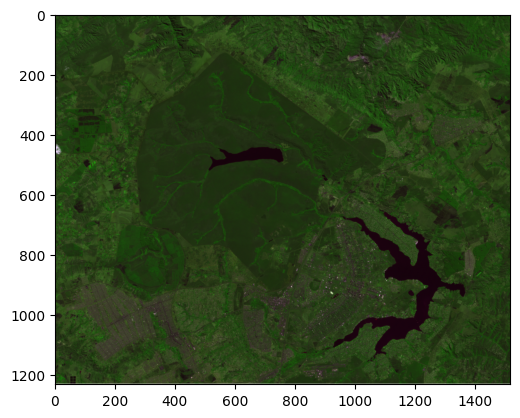

In [53]:
imshow(stack, (1,2,0))

**Forma 3 - RASTERIO**

In [67]:
!pip install rasterio

In [69]:
import rasterio
from rasterio.plot import show

In [96]:
img4 = rasterio.open('/content/L71221071_07120010720_DN.tif')

In [97]:
img4.shape

(1233, 1520)

In [82]:
# para transformar em numpy.array é semelhante ao GDAL
# porém, utiliza o próprio método da RASTERIO: .read()

b1 = rst.read(1)
b2 = rst.read(2)
b4 = rst.read(4)

In [83]:
stack = np.stack ([b1,b2,b4])


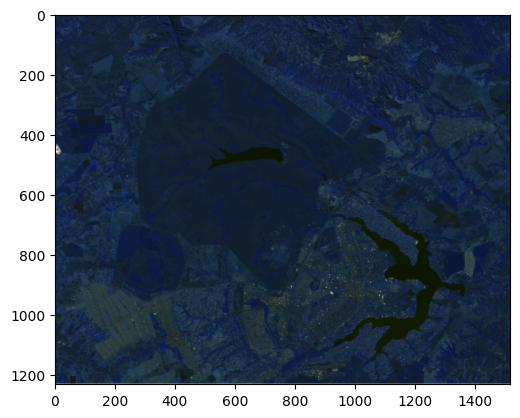

<Axes: >

In [87]:
show(stack, (2,1,0))

In [90]:
rst.shape

(1233, 1520)

# RASTERIO

In [98]:
!pip install rasterio

In [100]:
import rasterio
from rasterio.plot import show

In [101]:
rst = rasterio.open('/content/L71221071_07120010720_DN.tif')

In [102]:
rst.shape

(1233, 1520)

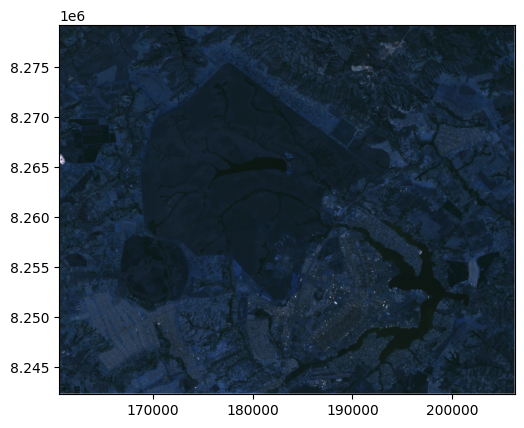

<Axes: >

In [124]:
show(rst, cmap=('Greys_r'))

In [103]:
b1 = rst.read(1)
b2 = rst.read(2)
b4 = rst.read(4)


In [111]:
stack = np.dstack([b1,b2,b4])

In [117]:
stack.shape

(1233, 1520, 3)

ImageView object:
  Display bands       :  (1, 2, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [np.float64(13.0), np.float64(255.0)]
    G: [np.float64(12.0), np.float64(255.0)]
    B: [np.float64(40.0), np.float64(255.0)]

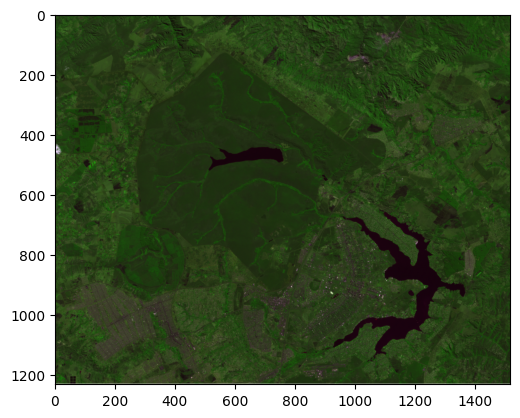

In [123]:
imshow(stack, (1,2,0))